<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(0)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0'

In [5]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,51.273073,71.031970,21.689647,20.968026,-0.260079,174.702637,175.301483,-0.598845
1,0.0,1.0,58.216419,35.994788,45.726878,74.567764,-0.454202,224.051646,224.284062,-0.232416
2,0.0,2.0,94.840730,87.564307,45.510430,67.821876,-1.474181,304.263161,305.725257,-1.462096
3,0.0,3.0,69.199043,56.239562,60.438241,38.835817,0.757637,235.470301,234.615743,0.854558
4,0.0,4.0,83.715065,29.287155,74.389530,79.364469,0.508114,277.264333,276.299801,0.964531
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,83.751775,68.993108,84.311797,84.152295,1.559675,332.768650,330.976327,1.792323
29996,999.0,26.0,77.300536,41.044830,45.884739,73.518350,0.058904,247.807360,247.682056,0.125304
29997,999.0,27.0,54.891845,88.225996,32.384490,53.651149,0.630723,239.784202,238.926071,0.858131
29998,999.0,28.0,74.191576,71.378633,95.617934,58.469024,-0.028583,309.628583,309.351294,0.277289


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,51.273073,71.031970,21.689647,20.968026,-0.260079,174.702637,175.301483,-0.598845
1,0.0,1.0,58.216419,35.994788,45.726878,74.567764,-0.454202,224.051646,224.284062,-0.232416
2,0.0,2.0,94.840730,87.564307,45.510430,67.821876,-1.474181,304.263161,305.725257,-1.462096
3,0.0,3.0,69.199043,56.239562,60.438241,38.835817,0.757637,235.470301,234.615743,0.854558
4,0.0,4.0,83.715065,29.287155,74.389530,79.364469,0.508114,277.264333,276.299801,0.964531
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,83.751775,68.993108,84.311797,84.152295,1.559675,332.768650,330.976327,1.792323
29996,999.0,26.0,77.300536,41.044830,45.884739,73.518350,0.058904,247.807360,247.682056,0.125304
29997,999.0,27.0,54.891845,88.225996,32.384490,53.651149,0.630723,239.784202,238.926071,0.858131
29998,999.0,28.0,74.191576,71.378633,95.617934,58.469024,-0.028583,309.628583,309.351294,0.277289


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    51.273073  71.031970  21.689647  20.968026 -0.260079  174.702637   
      1.0    58.216419  35.994788  45.726878  74.567764 -0.454202  224.051646   
      2.0    94.840730  87.564307  45.510430  67.821876 -1.474181  304.263161   
      3.0    69.199043  56.239562  60.438241  38.835817  0.757637  235.470301   
      4.0    83.715065  29.287155  74.389530  79.364469  0.508114  277.264333   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   83.751775  68.993108  84.311797  84.152295  1.559675  332.768650   
      26.0   77.300536  41.044830  45.884739  73.518350  0.058904  247.807360   
      27.0   54.891845  88.225996  32.384490  53.651149  0.630723  239.784202   
      28.0   74.191576  71.378633  95.617934  58.469024 -0.028583  309.628583   
      29.0   25.649679  67.240971  63.005928  79.448139  0.884310  246.229027   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.301483 -0.598845  
      1.0    224.284062 -0.232416  
      2.0    305.725257 -1.462096  
      3.0    234.615743  0.854558  
      4.0    276.299801  0.964531  
...                 ...       ...  
999.0 25.0   330.976327  1.792323  
      26.0   247.682056  0.125304  
      27.0   238.926071  0.858131  
      28.0   309.351294  0.277289  
      29.0   245.819378  0.409649  

[30000 rows x 8 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    51.273073  71.031970  21.689647  20.968026 -0.260079  174.702637   
      1.0    58.216419  35.994788  45.726878  74.567764 -0.454202  224.051646   
      2.0    94.840730  87.564307  45.510430  67.821876 -1.474181  304.263161   
      3.0    69.199043  56.239562  60.438241  38.835817  0.757637  235.470301   
      4.0    83.715065  29.287155  74.389530  79.364469  0.508114  277.264333   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   83.751775  68.993108  84.311797  84.152295  1.559675  332.768650   
      26.0   77.300536  41.044830  45.884739  73.518350  0.058904  247.807360   
      27.0   54.891845  88.225996  32.384490  53.651149  0.630723  239.784202   
      28.0   74.191576  71.378633  95.617934  58.469024 -0.028583  309.628583   
      29.0   25.649679  67.240971  63.005928  79.448139  0.884310  246.229027   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.301483 -0.598845  
      1.0    224.284062 -0.232416  
      2.0    305.725257 -1.462096  
      3.0    234.615743  0.854558  
      4.0    276.299801  0.964531  
...                 ...       ...  
999.0 25.0   330.976327  1.792323  
      26.0   247.682056  0.125304  
      27.0   238.926071  0.858131  
      28.0   309.351294  0.277289  
      29.0   245.819378  0.409649  

[30000 rows x 8 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,51.273073,71.031970,21.689647,20.968026,-0.260079,174.702637,175.301483,-0.598845
1,0.0,1.0,58.216419,35.994788,45.726878,74.567764,-0.454202,224.051646,224.284062,-0.232416
2,0.0,2.0,94.840730,87.564307,45.510430,67.821876,-1.474181,304.263161,305.725257,-1.462096
3,0.0,3.0,69.199043,56.239562,60.438241,38.835817,0.757637,235.470301,234.615743,0.854558
4,0.0,4.0,83.715065,29.287155,74.389530,79.364469,0.508114,277.264333,276.299801,0.964531
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,83.751775,68.993108,84.311797,84.152295,1.559675,332.768650,330.976327,1.792323
29996,999.0,26.0,77.300536,41.044830,45.884739,73.518350,0.058904,247.807360,247.682056,0.125304
29997,999.0,27.0,54.891845,88.225996,32.384490,53.651149,0.630723,239.784202,238.926071,0.858131
29998,999.0,28.0,74.191576,71.378633,95.617934,58.469024,-0.028583,309.628583,309.351294,0.277289


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    51.273073  71.031970  21.689647  20.968026 -0.260079  174.702637   
      1.0    58.216419  35.994788  45.726878  74.567764 -0.454202  224.051646   
      2.0    94.840730  87.564307  45.510430  67.821876 -1.474181  304.263161   
      3.0    69.199043  56.239562  60.438241  38.835817  0.757637  235.470301   
      4.0    83.715065  29.287155  74.389530  79.364469  0.508114  277.264333   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   83.751775  68.993108  84.311797  84.152295  1.559675  332.768650   
      26.0   77.300536  41.044830  45.884739  73.518350  0.058904  247.807360   
      27.0   54.891845  88.225996  32.384490  53.651149  0.630723  239.784202   
      28.0   74.191576  71.378633  95.617934  58.469024 -0.028583  309.628583   
      29.0   25.649679  67.240971  63.005928  79.448139  0.884310  246.229027   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.301483 -0.598845  
      1.0    224.284062 -0.232416  
      2.0    305.725257 -1.462096  
      3.0    234.615743  0.854558  
      4.0    276.299801  0.964531  
...                 ...       ...  
999.0 25.0   330.976327  1.792323  
      26.0   247.682056  0.125304  
      27.0   238.926071  0.858131  
      28.0   309.351294  0.277289  
      29.0   245.819378  0.409649  

[30000 rows x 8 columns]

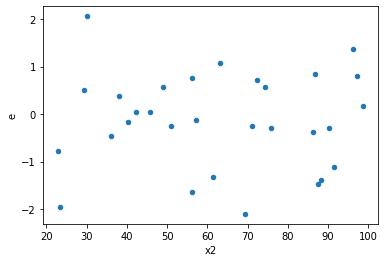

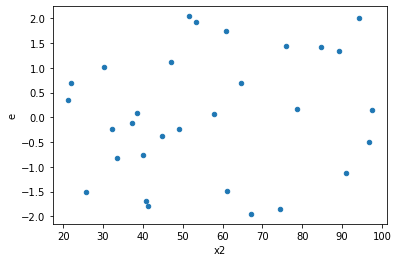

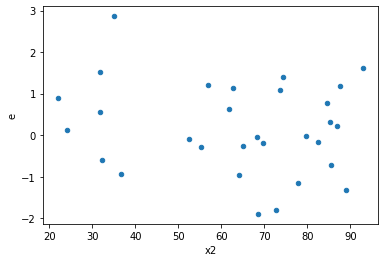

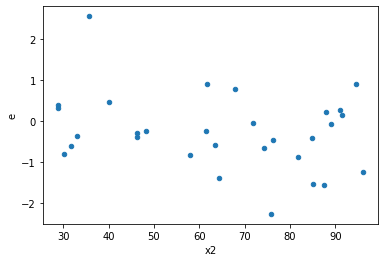

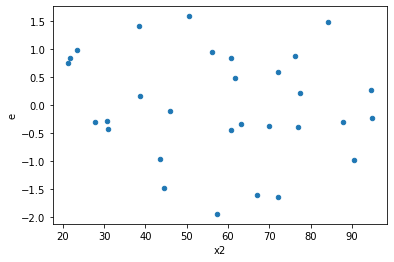

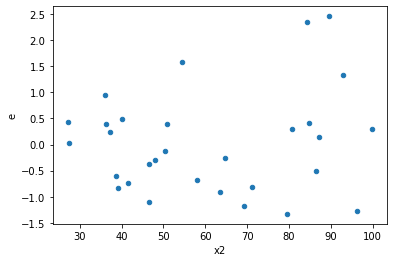

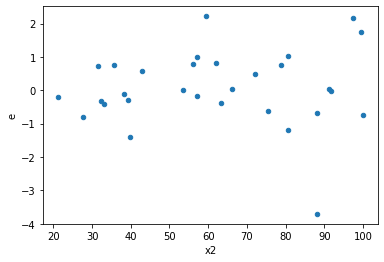

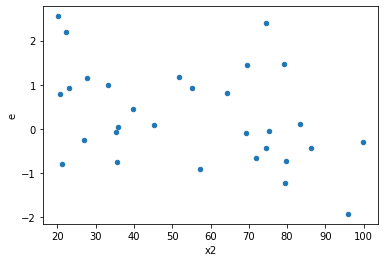

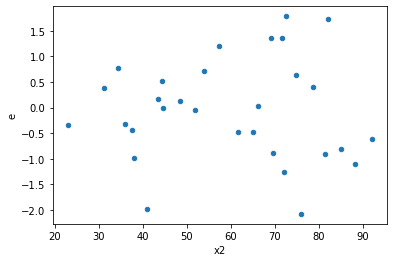

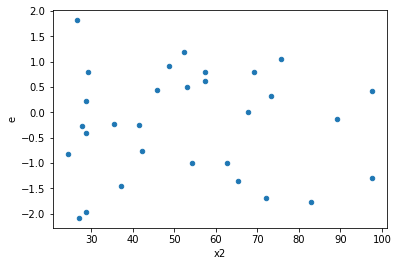

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,9.0,9.0,2978.2274828376203,6274.3228168445285,330.91416475973557,697.146979649392,2.1067305479521083,0.28223849301236115,0.8588807534938194,0.14111924650618057,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,2472.334650675893,2903.1770682677256,274.70385007509924,322.5752298075251,1.1742654124408474,0.8147878964341824,0.5926060517829088,0.4073939482170912,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,2010.562539283549,4369.237915095263,223.39583769817213,485.4708794550292,2.1731420086301876,0.2631068082577275,0.8684465958711363,0.13155340412886374,Reject001=1 : Homoscedasticity
10.0,9.0,9.0,1525.8266415537641,3452.123779154753,169.5362935059738,383.5693087949725,2.2624613341653426,0.23971086018076848,0.8801445699096158,0.11985543009038424,Reject001=1 : Homoscedasticity
12.0,9.0,9.0,2426.2213548757168,3286.953533615343,269.5801505417463,365.2170592905937,1.3547624280076116,0.6583695241426133,0.6708152379286934,0.32918476207130665,Reject001=1 : Homoscedasticity
14.0,9.0,9.0,3170.322005658722,4067.1831150396265,352.2580006287469,451.90923500440294,1.2828927496260925,0.7166011272461348,0.6416994363769326,0.3583005636230674,Reject001=1 : Homoscedasticity
16.0,9.0,9.0,2559.82817407299,2628.8120146139145,284.42535267477666,292.0902238459905,1.0269486214893726,0.9690524478112523,0.5154737760943738,0.48452622390562616,Reject001=1 : Homoscedasticity
21.0,9.0,9.0,910.1882478129415,4708.096651955748,101.13202753477128,523.1218502173053,5.172662537962519,0.022403624775418907,0.9887981876122905,0.011201812387709453,Reject001=1 : Homoscedasticity
22.0,9.0,9.0,1168.6616138149968,2155.0759899929035,129.85129042388854,239.4528877769893,1.844054741353094,0.37549455745961446,0.8122527212701928,0.18774727872980723,Reject001=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,4101.801317648124,816.0719266429334,455.7557019609026,90.67465851588149,0.19895452349965354,0.02464111299238149,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,4590.812175738896,1815.0190622568894,510.09024174876623,201.66878469520992,0.3953590329503646,0.18306436509021112,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,4745.0006420581785,2372.3774360828584,527.2222935620198,263.59749289809537,0.49997410222769173,0.316441916336644,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,2978.2274828376203,6274.3228168445285,330.91416475973557,697.146979649392,2.1067305479521083,0.28223849301236115,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,3703.076531324448,3401.650853912371,411.45294792493866,377.96120599026347,0.9186012833215013,0.9014303656358109,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,4119.143280973585,340.08081525707877,457.6825867748428,37.78675725078653,0.08256105506888281,0.0009882259056517332,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,4188.914224750879,3362.206807644805,465.43491386120877,373.57853418275613,0.8026439853503471,0.7486368578608487,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,2472.334650675893,2903.1770682677256,274.70385007509924,322.5752298075251,1.1742654124408474,0.8147878964341824,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,2010.562539283549,4369.237915095263,223.39583769817213,485.4708794550292,2.1731420086301876,0.2631068082577275,Reject001=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      986
Reject001=0 : Heteroscedasticity     14
Name: Result_test, dtype: int64